In [1]:
# install ucimlrepo, pandas, matplotlib packages

from ucimlrepo import fetch_ucirepo 

In [147]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
x = adult.data.features 
y = adult.data.targets 

# shape of data
x.shape, y.shape

((48842, 14), (48842, 1))

In [148]:
# look for null values, data types
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [149]:
# look for null values, data types
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [150]:
import pandas as pd

In [151]:
df = pd.concat([x, y], axis=1)
df.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
19744,57,Private,29375,HS-grad,9,Separated,Sales,Not-in-family,Amer-Indian-Eskimo,Female,0,0,35,United-States,<=50K
46549,62,Private,584259,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,44,United-States,<=50K.
7716,58,Self-emp-not-inc,222311,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,7688,0,55,United-States,>50K


In [152]:
# view unique values with value counts
df['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [153]:
def process_income(income):
    if income == '<=50K.':
        return '<=50K'
    elif income == '>50K.':
        return '>50K'
    else: 
        return income
    
df['income'] = df['income'].apply(process_income)
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [154]:
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [155]:
from matplotlib import pyplot as plt

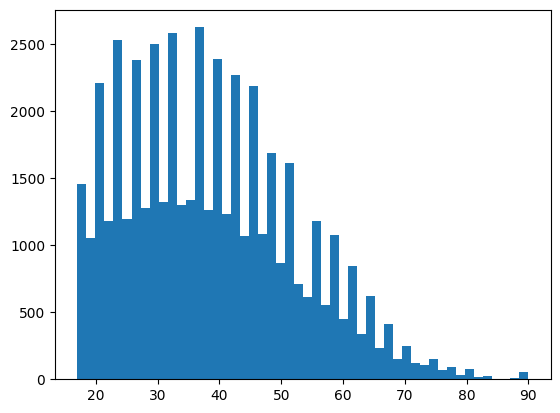

In [156]:
plt.hist(df['age'], bins=50)
plt.show()

In [157]:
(df['age'] > 75).sum()

373

In [158]:
age_filter_1 = df['age'] > 75
df.loc[age_filter_1]['age'].value_counts()

age
76    69
90    55
77    54
80    38
81    37
78    34
79    30
82    15
84    13
83    11
88     6
85     5
87     3
89     2
86     1
Name: count, dtype: int64

In [159]:
age_filter_2 = df['age'] > 84
age_filter_3 = df['age'] < 90
df.loc[age_filter_2 & age_filter_3, 'age'] = (75 + 90)/ 2
df.loc[age_filter_1]['age'].value_counts()

/var/folders/qj/pw1c7jg14nd01mgxxf40rq9c0000gn/T/ipykernel_35939/361181970.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '82.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[age_filter_2 & age_filter_3, 'age'] = (75 + 90)/ 2


age
76.0    69
90.0    55
77.0    54
80.0    38
81.0    37
78.0    34
79.0    30
82.5    17
82.0    15
84.0    13
83.0    11
Name: count, dtype: int64

In [160]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [161]:
workclass_filt_1 = df['workclass'] == 'Without-pay'
workclass_filt_2 = df['workclass'] == 'Never-worked'

df.loc[workclass_filt_1 | workclass_filt_2, 'income'].value_counts()

income
<=50K    29
>50K      2
Name: count, dtype: int64

In [162]:
indices = df[(workclass_filt_1 | workclass_filt_2) & (df['income'] == '>50K')].index
df = df.drop(indices)
df.shape

(48840, 15)

In [165]:
def process_workclass(workclass):
    if workclass == '?':
        return 'unknown'
    elif workclass in ['Without-pay', 'Never-worked']:
        return 'unemployed'
    else:
        return workclass
    
df['workclass'] = df['workclass'].apply(process_workclass)
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
unknown              1836
Self-emp-inc         1695
Federal-gov          1432
unemployed             29
Name: count, dtype: int64